<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Term 2 - ML With Candy Data 

## Table of Content

1. [Data Loading and Description](#section1)<br>
2. [Exploratory Data Analysis](#section3)<br>


## 1. Data Loading and Description

`candy-data.csv` includes attributes for each candy along with its ranking. 

For **binary variables**, <u>1 means yes, 0 means no</u>. The data contains the following fields:


| Feature   	| Description                    	|   	
|-----------	|--------------------------------	|
| chocolate 	| Does it contain chocolate?     	|
| fruity    	| Is it fruit flavored?          	|
| caramel   	| Is there caramel in the candy? 	|
|peanutalmondy:|Does it contain peanuts, peanut butter or almonds?|
|nougat| Does it contain nougat?|
|crispedricewafer| Does it contain crisped rice, wafers, or a cookie component?|
|hard| Is it a hard candy?|
|bar| Is it a candy bar?|
|pluribus| Is it one of many candies in a bag or box?|
|sugarpercent| The percentile of sugar it falls under within the data set.|
|pricepercent| The unit price percentile compared to the rest of the set.|
|winpercent| The overall win percentage according to 269,000 matchups.|


__Importing Packages__

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy.stats import norm

from sklearn.preprocessing import StandardScaler

from scipy import stats


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing the Dataset

In [69]:
df_train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
df_train.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## 3. Exploratory Data Analysis

In [70]:
df_train.shape

(85, 13)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


There are no Null Values in data set.

In [72]:
df_train.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


There are 85 **observations**

In [73]:
df_train.sugarpercent = round(df_train.sugarpercent,3)
df_train.pricepercent = round(df_train.pricepercent,3)
df_train.winpercent = round(df_train.winpercent,3)

Rounding off Sugarpercent,PricePercent and WinPercent upto 3 decimal digits,so Identification will be more clear

In [74]:
df_train.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.117
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341


### Now  all the values inside the SugarPercent,PricePercent and Win percent roundedoff

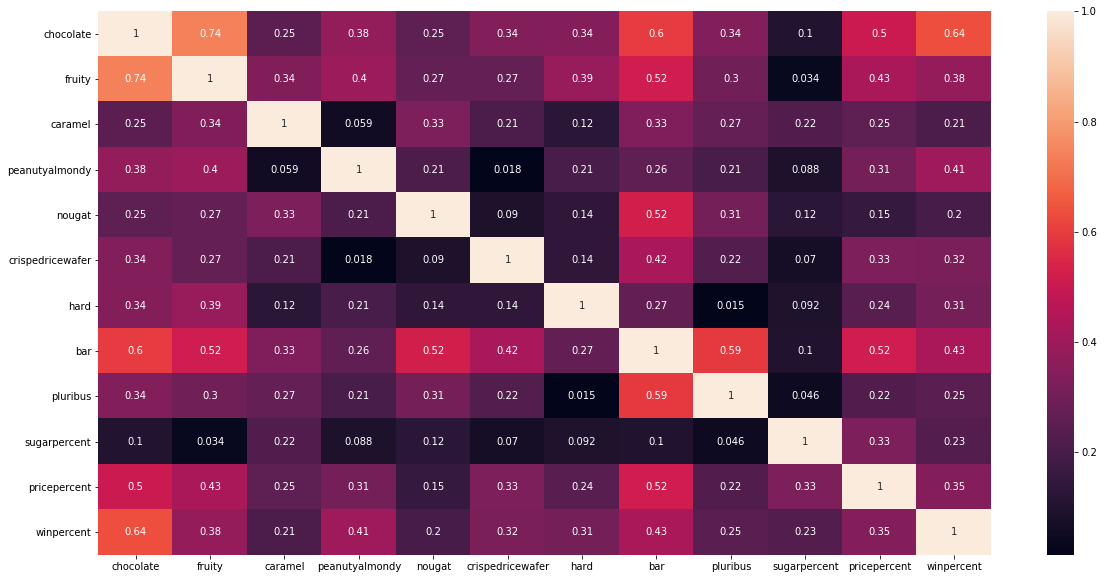

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr().abs(),annot=True)

In [76]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
corrank(df_train)

,Feature1,Feature2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
5,bar,pricepercent,0.518407
6,fruity,bar,0.515066
7,chocolate,pricepercent,0.504675
8,fruity,pricepercent,0.430969
9,bar,winpercent,0.429933


### As per above Co-relation chart. Chocolate and Frutiy are high co-related.

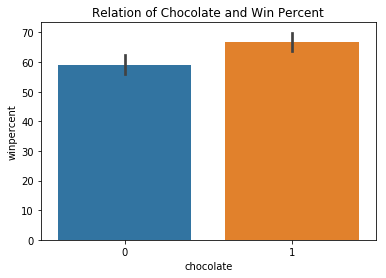

In [77]:
winners = df_train[df_train.winpercent>df_train.winpercent.quantile(0.6)]
winners.winpercent.count()

sns.barplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent');


### Observation :-
From the above plot we can say that more than 60% of the population likes Chocolate so it might be important parameter.

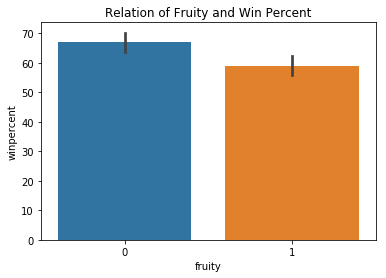

In [37]:
sns.barplot(x="fruity", y="winpercent", data=winners).set_title('Relation of Fruity and Win Percent');

### Observation :-
From the above plot we can say that more than 60% of the population likes fruity so it might be important parameter.

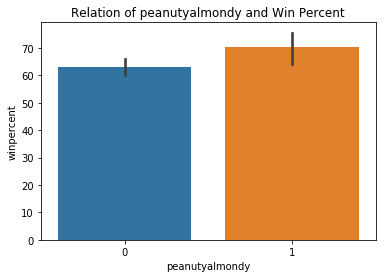

In [78]:
sns.barplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of peanutyalmondy and Win Percent');

### Observation :-
From the above plot we can say that more than 60% of the population likes peanutyalmondy so it might be important parameter.

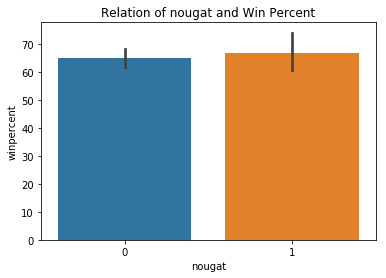

In [79]:
sns.barplot(x="nougat", y="winpercent", data=winners).set_title('Relation of nougat and Win Percent');

### Observation :-
From the above plot we can say that more than 60% of the population likes nougat so it might be important parameter.

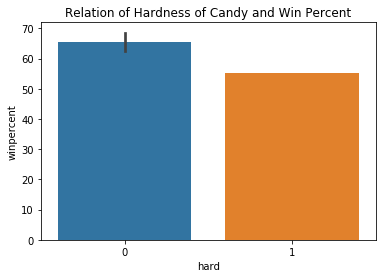

In [41]:
sns.barplot(x="hard", y="winpercent", data=winners).set_title('Relation of Hardness of Candy and Win Percent');

### Observation:-
From the above plot we can say that more than 60% of the population likes Soft Candies so it might be important parameter. 

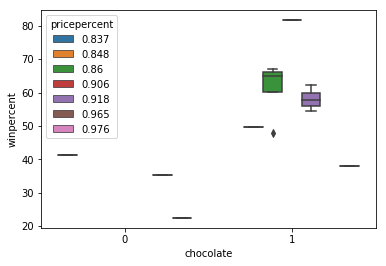

In [80]:
newdata = df_train[df_train.pricepercent>0.8]

sns.boxplot(x='chocolate',y='winpercent',hue='pricepercent',data=newdata)

### Observation:-
From the above plot we can say that high rates candies are not good win percent. 

['100 Grand', '3 Musketeers', 'One dime', 'One quarter', 'Air Heads', 'Almond Joy', 'Baby Ruth', 'Boston Baked Beans', 'Candy Corn', 'Caramel Apple Pops']


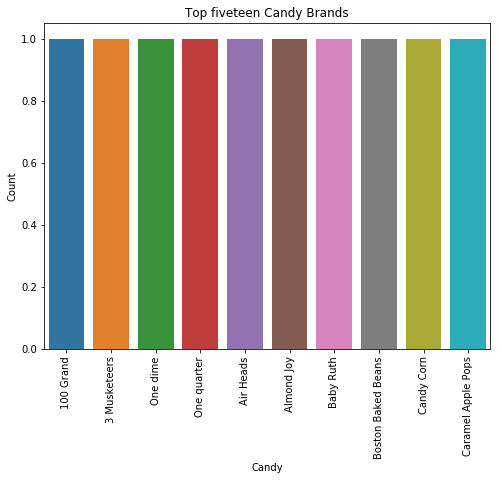

In [87]:
from collections import Counter
newdata = df_train[df_train.winpercent>0.9]

candy_count = Counter(newdata.competitorname.dropna().tolist()).most_common(10)
candy_idx = [candy[0] for candy in candy_count]
candy_val = [candy[1] for candy in candy_count]
print(candy_idx)
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = candy_idx,y=candy_val ,ax =ax)
plt.title('Top fiveteen Candy Brands')
plt.xlabel('Candy')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### Observation:-
 Above graph shows top 10 candy brands whose winpercent is greator than 0.9

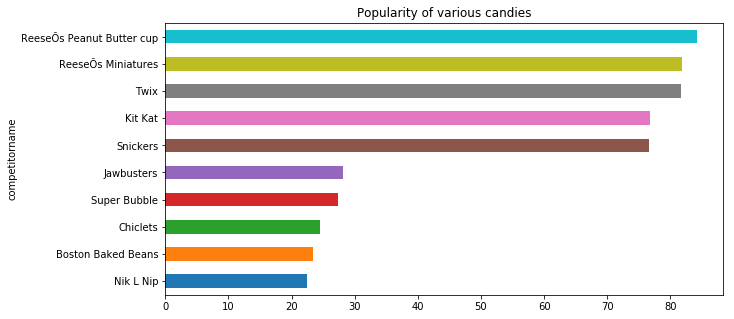

In [89]:
popularity = df_train[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Popularity of various candies',sort_columns=True,figsize = (10,5),legend=False)

### Observation:-
Most popular candy brand is Reese0s Peanut Buttor cup.

In [105]:
X = df_train[df_train.columns[1:-1]]
print(X.shape)

(85, 11)


In [96]:
from sklearn.cross_validation import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

NameError: name 'X' is not defined